# Project Notebook - Bank Marketing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Loading and Preparation

- The dataset for this project was already downloaded from: [UC Irvine Machine Learning Repository - Bank Marketing](https://archive.ics.uci.edu/dataset/222/bank+marketing) 
- The actual file to be employed is in the same directory as this notebook *bank-additional-full.csv*.



In [2]:
df = pd.read_csv('bank-additional-full.csv', sep=';')

Lets take a look at the data and see the actual column names

In [3]:
df.head().T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


In [4]:
df.y = (df.y == 'yes').astype(int)
df.y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

Just to keep consistensy among column and categorial values, lets replace "." and "-" by "_"

In [6]:
columns = []
for c in list(df.columns):
    columns.append(c.replace('.','_'))

In [7]:
df.columns = columns

In [8]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [9]:
categorical_features = list(df.dtypes[df.dtypes == 'object'].index)
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [10]:
for c in categorical_features:
    print(df[c].unique())

['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
['married' 'single' 'divorced' 'unknown']
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
['no' 'unknown' 'yes']
['no' 'yes' 'unknown']
['no' 'yes' 'unknown']
['telephone' 'cellular']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
['mon' 'tue' 'wed' 'thu' 'fri']
['nonexistent' 'failure' 'success']


In [11]:
for c in categorical_features:
    df[c] = df[c].str.replace('.', '_').str.replace('-','_')

Now lets make sure if there are missing values

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

There are no missing values. Lets see in the categorical features if there are missing values labeled in an specific way

In [13]:
for c in categorical_features:
    print(f"{c} ==> {df[c].unique()}")

job ==> ['housemaid' 'services' 'admin_' 'blue_collar' 'technician' 'retired'
 'management' 'unemployed' 'self_employed' 'unknown' 'entrepreneur'
 'student']
marital ==> ['married' 'single' 'divorced' 'unknown']
education ==> ['basic_4y' 'high_school' 'basic_6y' 'basic_9y' 'professional_course'
 'unknown' 'university_degree' 'illiterate']
default ==> ['no' 'unknown' 'yes']
housing ==> ['no' 'yes' 'unknown']
loan ==> ['no' 'yes' 'unknown']
contact ==> ['telephone' 'cellular']
month ==> ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week ==> ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome ==> ['nonexistent' 'failure' 'success']


We can see there are missing values marked as **unknown** in almost all categorical features: job, marital, education, default, housing and loan

For the purpose of this project, we'll use "unknown" as a valid class on each of these categorical features

In [14]:
numerical_features = list(df.dtypes[df.dtypes != 'object'].index)
numerical_features.remove('y') # let us remove the target column of the dataset

Now we have identified both categorical and numerical features.

Nex step is to split the data in terms of train, validation and test

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [17]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [18]:
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

In [19]:
del df_train['y']
del df_val['y']
del df_test['y']

Now we are ready to do some exploratory data analysis

## EDA and Feature Importance

In order to understand the relationship between our target variable and the available features lets calculate:
- Mutual Information - for categorical features
- Risk Ratio - for categorical features
- Correlation - for numerical features

### Mutual information

In [20]:
from sklearn.metrics import mutual_info_score

In [21]:
def mutual_info_y_score(series):
    return mutual_info_score(df.y, series)

In [22]:
mi = df[categorical_features].apply(mutual_info_y_score).sort_values(ascending=False)
mi

poutcome       0.030384
month          0.026407
contact        0.011646
job            0.009859
default        0.005774
education      0.002390
marital        0.001434
day_of_week    0.000322
housing        0.000069
loan           0.000013
dtype: float64

The most important features based on this ranking would be: **poutcome**, **month** and **contact**. In particular:
- **poutcome**, represents outcome of the previous marketing campaign (categorical: "failure","nonexistent","success"). This would mean that if previous marketing campaign was successful, a future marketing campaign could be successful again.

### Risk Ratio

Lets calculate the Risk Ratio specifically for the most important features we identified on the Mutual Information

In [23]:
global_mktsucess_rate = df_full_train.y.mean()
round(global_mktsucess_rate, 2)

0.11

In [24]:
rr_features = ['poutcome', 'month', 'contact']

for c in rr_features:
    print('#######################')
    print(c)
    df_group = df_full_train.groupby(c)['y'].agg(['mean', 'sum'])
    df_group['diff'] = df_group['mean'] - global_mktsucess_rate
    df_group['risk'] = df_group['mean'] / global_mktsucess_rate
    print(df_group.sort_values(by='risk', ascending=False))
    print('#######################')
    print()

#######################
poutcome
                 mean   sum      diff      risk
poutcome                                       
success      0.650414   707  0.538244  5.798469
failure      0.138718   474  0.026548  1.236679
nonexistent  0.088413  2515 -0.023757  0.788207
#######################

#######################
month
           mean  sum      diff      risk
month                                   
dec    0.509934   77  0.397764  4.546082
mar    0.500000  222  0.387830  4.457522
sep    0.459574  216  0.347405  4.097126
oct    0.431338  245  0.319168  3.845397
apr    0.198864  420  0.086694  1.772878
aug    0.106405  520 -0.005765  0.948603
jun    0.103881  439 -0.008289  0.926101
nov    0.100091  329 -0.012079  0.892318
jul    0.091694  531 -0.020476  0.817456
may    0.063283  697 -0.048887  0.564172
#######################

#######################
contact
               mean   sum      diff      risk
contact                                      
cellular   0.145902  3060  0.03

Based on these results, we can identify with more depth on the poutcome feature that if actually a previous marketing campaing was successful with a client, there is a good chance for a new campaign marketing to succeed. 

We also identified december, march, september, october and april to be the most important months to carry a marketing campaing.

Finally, if the makerting campaign is delivered to the client's cellular phone will have a bigger chance for success.

Next Step: Correlation

### Correlation

Lets calculate the correlation between numerical features and the target variable

In [25]:
df_full_train[numerical_features].corrwith(df_full_train.y)

age               0.033347
duration          0.404063
campaign         -0.065664
pdays            -0.321177
previous          0.225922
emp_var_rate     -0.295420
cons_price_idx   -0.135306
cons_conf_idx     0.059692
euribor3m        -0.304040
nr_employed      -0.351790
dtype: float64

We can see that the **duration** feature is the one with the highest correlation coeficient.

Based on the dataset documentation, you can find below the description of this feature:

**duration**: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Based on this, unfourtunately should discard this feature from the dataset

In [26]:
del df_train['duration']
del df_val['duration']
del df_test['duration']

## Model Selection

We are going to test between 3 different ML Learning models for binary classification
- Decision Trees
- Random Forest
- XGBoost

The way to compare each model will be to train it and get predictions to get the accuracy.

The tool to be employed for model accuracy will be the ROC curves and AUC scores


### Decision Trees

First we are going to get the default model performance and then we are going to tune it using the following parameters:
- max_depth
- min_samples_leaf

In [27]:
# loading libraries
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [28]:
# Converting dataframes to dictionaries

train_dict = df_train.to_dict(orient='records')
val_dict = df_val.to_dict(orient='records')


In [29]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)

In [30]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
y_pred = dt.predict_proba(X_val)[:,1]

In [32]:
roc_auc_score(y_val, y_pred)

0.6148714110465286

Now lets tune the model

In [33]:
depths = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 50]
for d in depths:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:,1]
    score = roc_auc_score(y_val, y_pred)
    print(d, round(score, 5))

2 0.73472
3 0.73991
4 0.76255
5 0.7775
6 0.781
7 0.77331
8 0.76396
9 0.74831
10 0.72607
15 0.63247
20 0.60827
50 0.62302


From this we can see that max_depths of 5, 6 and 7 give the best results. From that point we can tune the next parameter **min_samples_leaf**

In [34]:
depths = [5, 6, 7]
sample_leafs = [1, 2, 5, 10, 15, 20, 100, 200, 500]
scores = []
for d in depths:
    for s in sample_leafs:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)
        y_pred = dt.predict_proba(X_val)[:,1]
        score = roc_auc_score(y_val, y_pred)
        scores.append((d, s, score))

<Axes: xlabel='depth', ylabel='leafs'>

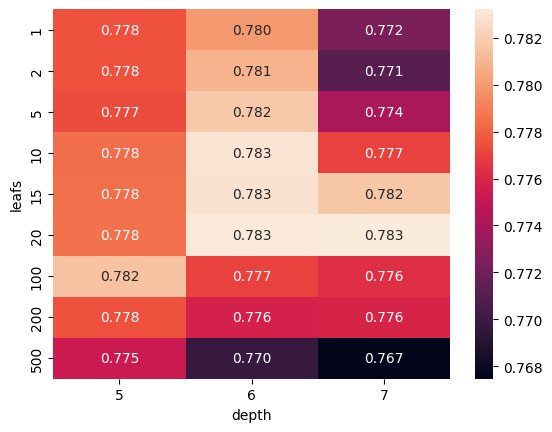

In [35]:
df_scores = pd.DataFrame(scores, columns=['depth', 'leafs', 'score'])
sns.heatmap(df_scores.pivot(index='leafs', columns='depth', values='score'), annot=True, fmt='.3f')

**Final Result for Decision Trees**: after tunning the decision tree with these parameters:
- max_depth = 10
- min_sample_leaf = 6

We got a ROC UAC Score of **0.783**

Next stop, Random Forest

### Random Forest

As we did with the Decision Tree model, we are going to try the Random Forest model with default parameters and tune it using:
- n_estimators
- max_depth
- min_sample_leaf


In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rf = RandomForestClassifier(n_estimators=10, random_state=1) # we use n_estimators=10 as default paramenter
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [38]:
y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.7416154306744166

Now we can try with different n_estimators values to see the best choice

In [39]:
score = []
for e in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=e, random_state=1) # we use n_estimators=10 as default paramenter
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:,1]
    score.append((e, roc_auc_score(y_val, y_pred)))

In [40]:
df_scores = pd.DataFrame(score, columns=['n_estimators', 'auc'])
df_scores


,n_estimators,auc
0,10,0.741615
1,20,0.754572
2,30,0.757387
3,40,0.759188
4,50,0.761819
5,60,0.761748
6,70,0.763361
7,80,0.764550
8,90,0.764848
9,100,0.765222


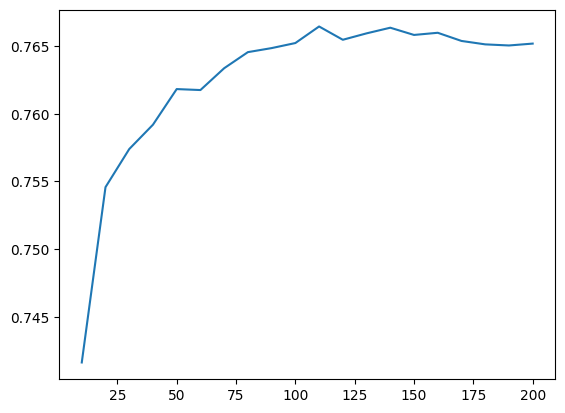

In [41]:
plt.plot(df_scores.n_estimators, df_scores.auc)

Looking at the results table and the chart we see that a n_estimator=100 would be ideal, since after that there is no real considerable impact over the auc score.

Now we can tune the max_depth parameter

In [42]:
scores = []

for d in [5, 6, 7, 10, 15]:
    for e in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=e, random_state=1, max_depth=d)
        rf.fit(X_train, y_train)
        
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d, e, auc))

df_scores = pd.DataFrame(scores, columns=['depth', 'n_estimators', 'auc'])
df_scores

,depth,n_estimators,auc
0,5,10,0.778699
1,5,20,0.783558
2,5,30,0.785619
3,5,40,0.786877
4,5,50,0.787101
...,...,...,...
95,15,160,0.792550
96,15,170,0.793133
97,15,180,0.793548
98,15,190,0.793480


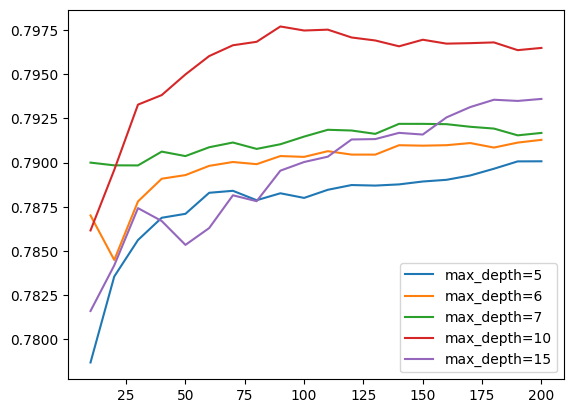

In [43]:
for d in [5, 6, 7, 10, 15]:
    df_subset = df_scores[df_scores.depth == d]
    plt.plot(df_subset.n_estimators, df_subset.auc, label="max_depth=%d" % d)
plt.legend()

Based on this result we clearly see that a **max_depth=10** is the best option. 

Final step: tune the min_sample_leaf parameter

In [44]:
scores = []

for s in [1, 5, 10, 20, 50]:
    for e in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=e, random_state=1, max_depth=10, min_samples_leaf=s)
        rf.fit(X_train, y_train)
        
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((s, e, auc))

df_scores = pd.DataFrame(scores, columns=['sample_leaf', 'n_estimators', 'auc'])
df_scores

,sample_leaf,n_estimators,auc
0,1,10,0.786160
1,1,20,0.789582
2,1,30,0.793271
3,1,40,0.793811
4,1,50,0.794978
...,...,...,...
95,50,160,0.792389
96,50,170,0.792616
97,50,180,0.792583
98,50,190,0.792392


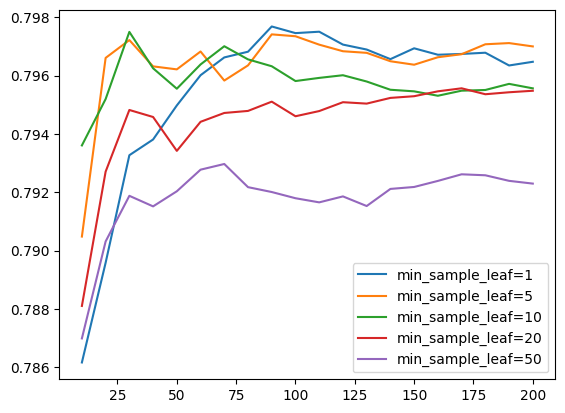

In [45]:
for s in [1, 5, 10, 20, 50]:
    df_subset = df_scores[df_scores.sample_leaf == s]
    plt.plot(df_subset.n_estimators, df_subset.auc, label="min_sample_leaf=%d" % s)
plt.legend()

Based on these results, the best parameters would be:
- n_estimators=100
- max_depth=10
- min_sample_leaf=1

With these parameters lets get the final auc score


In [46]:
rf = RandomForestClassifier(n_estimators=100, random_state=1, max_depth=10, min_samples_leaf=1)
rf.fit(X_train, y_train)

y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.7974600578321699

In this case Random Forest model gave us a better score than Decision Trees with an auc score of **0.7974**

Lets work with the final model XGBoost

### XGBoost

We are goint to test XGBoost model and after that, tune it with the following parameters:
- eta
- max_depth
- min_child_weight

In [47]:
import xgboost as xgb

In [48]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [49]:
# we are using the following parameters as the starting point before tunning the model
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [50]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.80004768233198

At this point we got a better score using XGBoost without tunning it, lets tune the model to get even better results starting from the eta value

In [51]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [52]:
def parse_output(output):
    records = []
    for line in output.split("\n"):
        if len(line.split("\t"))>1:
            num_iter, train_auc, val_auc = line.split("\t")
            num_iter = int(num_iter.strip('[]'))
            train_auc = float(train_auc.split(':')[1])
            val_auc = float(val_auc.split(':')[1])
            records.append((num_iter, train_auc, val_auc))

    columns = ['num_iter', 'train_auc', 'val_auc']
    df_scores = pd.DataFrame(records, columns=columns)
    return df_scores
    

In [60]:
scores = {}

We will run the following two cells below using 'eta': 0.01, 0.05, 0.1, 0.3, 0.5, 1

In [74]:
%%capture output

xgb_params = {
    'eta': 1,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'nthread': 8,
    'eval_metric': 'auc',

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, evals=watchlist, 
                  verbose_eval=5, num_boost_round=200)

In [75]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_output(output.stdout)
key

'eta=1'

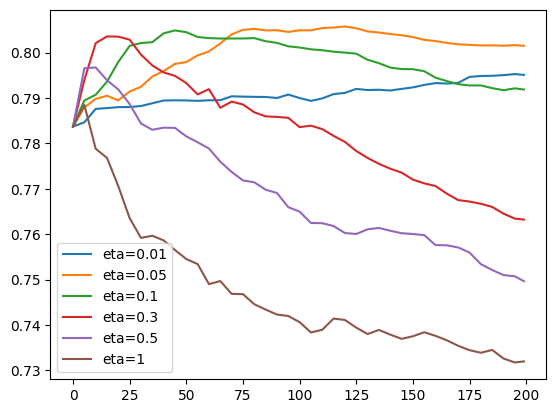

In [77]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend()

Based on this chart an **eta=0.05** will be fixed

Now multiple max_depth values will be tried including: 2, 3, 5, 6, 7, 10

In [124]:
%%capture output

xgb_params = {
    'eta': 0.05,
    'max_depth': 10,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'nthread': 8,
    'eval_metric': 'auc',

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, evals=watchlist, 
                  verbose_eval=5, num_boost_round=200)

In [125]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_output(output.stdout)
key

'max_depth=10'

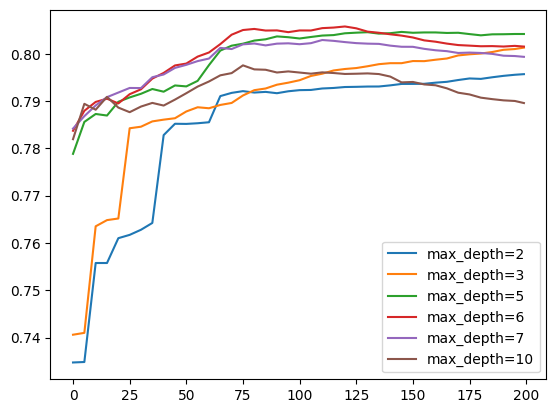

In [126]:
for key, df_score in scores.items():
    if "max" in key:        
        plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend()

In this case **max_depth=6** will be the best choice for our model

Finally lets fix **max_depth=6** and try different **min_child_weight** values, including 1, 10, 20, 30

In [142]:
%%capture output

xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'min_child_weight': 30,

    'objective': 'binary:logistic',
    'nthread': 8,
    'eval_metric': 'auc',

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, evals=watchlist, 
                  verbose_eval=5, num_boost_round=200)

In [143]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_output(output.stdout)
key

'min_child_weight=30'

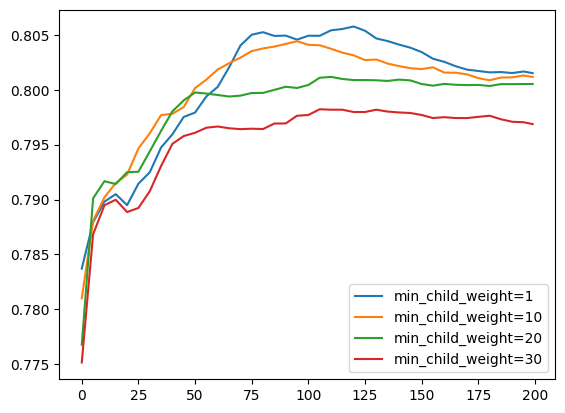

In [144]:
for key, df_score in scores.items():
    if "min" in key:        
        plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend()

The **min_child_weight=1** was the best value for this parameter. The final parameter values would be:
- 'eta': 0.1
- 'max_depth': 5
- 'min_child_weight': 30

Just to make sure the right number of iterations lets get the max val_auc

In [150]:
for key, df_score in scores.items():
    if key == "min_child_weight=1":
        print(df_score[df_score.val_auc == df_score.val_auc.max()])


    num_iter  train_auc  val_auc
24       120    0.85266  0.80576


So, num_boost_round parameter will be fixed at 120

In [151]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'nthread': 8,
    'eval_metric': 'auc',

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=120)
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8055448783479862

An AUC score of **0.8055** is the best score among the three models. 

This would be the end of this notebook, since the next steps will happen outside of it:
- A script called [train.py]('train.py). This script will complete the model training and testing with the full train data.

For this lets prepare the full_train dataset to train the model with more data and test it with test dataset

In [ ]:
y_full_train = df_full_train.y.values

In [154]:
# removing target variable y duration feature from full train dataset
del df_full_train['y']
del df_full_train['duration']

In [157]:
full_train_dict = df_full_train.to_dict(orient='records')
test_dict = df_test.to_dict(orient='records')

In [158]:
X_full_train = dv.transform(full_train_dict)
X_test = dv.transform(test_dict)

In [161]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train, feature_names=features)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=features)

In [162]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'nthread': 8,
    'eval_metric': 'auc',

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=120)
y_pred = model.predict(dtest)
roc_auc_score(y_test, y_pred)

0.809699419188281

The **score of 0.8096** is consistent with what we achieved before

## Saving the model

Now that we got our model tested we can save it to a file for deployment

In [164]:
import pickle

In [165]:
output_filename = 'model.bin'
f_out = open(output_filename, 'wb') # w is for write and b is for binary
pickle.dump((dv, model), f_out)
f_out.close()

In [171]:
full_train_dict[500]

{'age': 32,
 'job': 'admin_',
 'marital': 'single',
 'education': 'university_degree',
 'default': 'no',
 'housing': 'no',
 'loan': 'no',
 'contact': 'cellular',
 'month': 'aug',
 'day_of_week': 'tue',
 'campaign': 1,
 'pdays': 999,
 'previous': 0,
 'poutcome': 'nonexistent',
 'emp_var_rate': 1.4,
 'cons_price_idx': 93.444,
 'cons_conf_idx': -36.1,
 'euribor3m': 4.966,
 'nr_employed': 5228.1}